# <center>Data Mining Project Code</center>

** **
## <center>*03 - XXXX*</center>

** **

In this notebook, we start our customer segmentation using two different partitioning methods: K-means and K-medoids. Each algorithm is going to be applied to different datasets which suffered from different transformations.

The members of the `team` are:
- Ana Farinha  - 20211514
- António Oliveira - 20211595
- Mariana Neto - 20211527
- Salvador Domingues - 20240597


# ToC

<a class="anchor" id="top"></a>


1. [Importing Libraries & Data](#1.-Importing-Libraries-&-Data) <br><br>

1. [Clustering](#2.-Clustering) <br><br>


In [1]:
import pandas as pd
import numpy as np
from IPython.display import display 


# Clustering algorithms
from sklearn.cluster import KMeans

# Segmentation
import segmentation as s

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

# Others
from functions import *

# Suppress Warnings
import warnings
warnings.filterwarnings("ignore")

## Evaluating
- R2: compare linkage methods in hierarchical clustering with the same number of clusters. Measure of the homogeneity of a cluster solution. In class, it was used to compare different algorithms.
- Silhouette Score: can be used in most algorithms. Checks the quality of a cluster. Use visualization and score to compare different clustering solutions.
- Inertia: K-means specific



**Compare clusters**: crosstab

# 1. Importing Libraries & Data

In [2]:
data = pd.read_csv('data/preprocessed_data.csv', 
                   index_col = "customer_id")
cui_data = data[s.cuisine_preferences]
cui_data

,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai
customer_id,,,,,,,,,,,,,,,
1b8f824d5e,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,28.88,0.00,0.0,0.0,0.0,0.0,0.0
5d272b9dcb,12.82,6.39,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
f6d1b2ba63,9.20,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
180c632ed8,0.00,13.70,0.00,0.0,0.0,0.0,0.00,0.0,17.86,0.00,0.0,0.0,0.0,0.0,0.0
4eb37a6705,14.57,40.87,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f4e366c281,0.00,0.00,18.04,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
f6b6709018,18.04,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
f74ad8ce3f,0.00,0.00,0.00,0.0,0.0,0.0,17.79,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0


# 2. Clustering

## 2.1 Hierarchical Clustering

In [3]:
hc_methods = ["ward", "complete", "average", "single"]
max_nclus = 10

r2_hc = np.vstack([get_r2_hc(cui_data[s.cuisine_preferences], 
                              link, 
                              max_nclus=max_nclus, 
                              min_nclus=3, 
                              dist="euclidean") 
                              for link in hc_methods])

In [18]:
r2_hc_methods = pd.DataFrame(r2_hc.T, index=range(3, max_nclus + 1), columns=hc_methods)
r2_hc_methods

,ward,complete,average,single
1,9.191109e-34,9.191109e-34,9.191109e-34,9.191109e-34
2,1.843189e-01,3.811900e-02,1.535504e-02,9.675723e-03
3,2.705762e-01,5.391956e-02,2.744823e-02,2.176892e-02
4,3.151645e-01,6.359538e-02,3.712401e-02,3.712401e-02
5,3.538291e-01,8.121811e-02,4.398771e-02,4.013477e-02
6,3.911311e-01,8.758967e-02,5.017709e-02,4.404510e-02
7,4.173624e-01,9.203680e-02,5.318784e-02,4.537997e-02
8,4.427342e-01,1.117753e-01,5.506124e-02,5.156934e-02
9,4.649153e-01,1.142577e-01,1.108726e-01,5.344278e-02
10,4.855501e-01,2.177293e-01,1.218343e-01,5.896037e-02


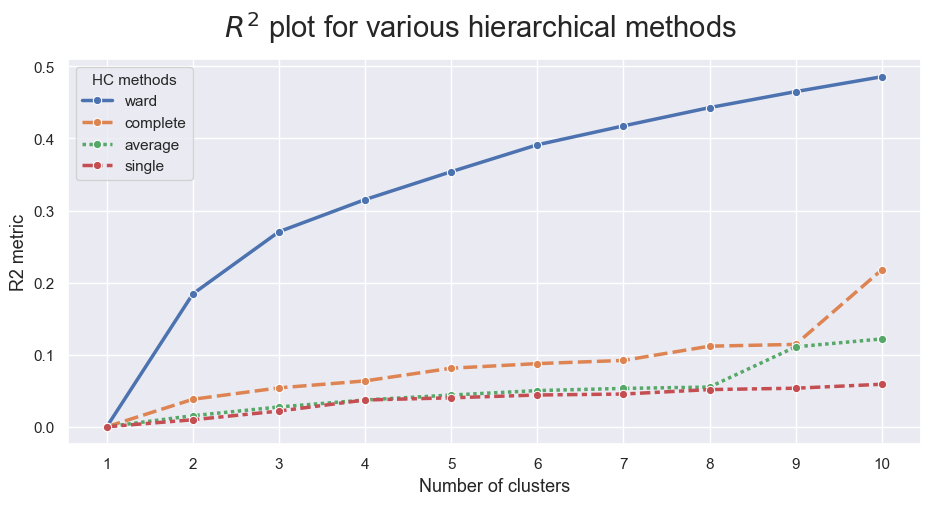

In [5]:

sns.set()

# Plot data
fig = plt.figure(figsize=(11,5))
sns.lineplot(data=r2_hc_methods, linewidth=2.5, markers=["o"]*4)

# Finalize the plot
plt.legend(title="HC methods", title_fontsize=11)
plt.xticks(range(1, max_nclus + 1))
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)

fig.suptitle("$R^2$ plot for various hierarchical methods", fontsize=21)

plt.show()

## 2.2 K-Means

**Elbow Method**

In [6]:
dispersion = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=30, init='k-means++').fit(cui_data)
    dispersion.append(kmeans.inertia_)

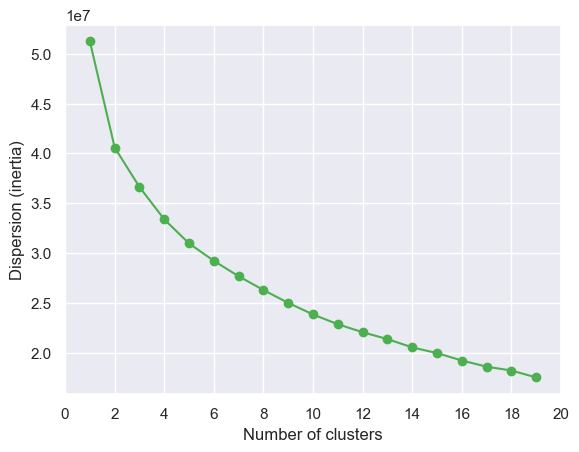

In [7]:
plt.plot(range(1, 20), dispersion, marker='o', color='#4CAF50')
plt.xlabel('Number of clusters')
plt.ylabel('Dispersion (inertia)')
plt.xticks(np.arange(0, 21, step=2))  
# plt.vlines(7, 5000, 600000, color='red')

plt.show()

In [19]:
# Compare multiple kmeans
r2_scores = {}
r2_scores['kmeans'] = get_rsq(cui_data, s.cuisine_preferences, kmeans, min_k=12, max_k=24) 
r2_scores_df = pd.DataFrame(r2_scores)
r2_scores_df

,kmeans
12,0.565077
13,0.584400
14,0.596078
15,0.611598
16,0.621132
17,0.633552
18,0.640666
19,0.653948
20,0.664764
21,0.674157


In [9]:
# For one solution of kmeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=20, init='k-means++').fit(cui_data)
cui_data['kmeans'] = kmeans.labels_
r2_score = calculate_r2(cui_data, s.cuisine_preferences, 'kmeans') 
print("R-squared:", r2_score)

R-squared: 0.28480256166779583


In [15]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [13]:
silhouette_score(cui_data[s.cuisine_preferences], cui_data['kmeans'])

np.float64(0.562971232418707)

In [16]:
silhouette_samples(cui_data[s.cuisine_preferences], cui_data['kmeans'])

array([0.56909624, 0.69208652, 0.71095936, ..., 0.63728544, 0.68515138,
       0.7118236 ])

## 2.3 Self-Organizing Maps (SOM)

## 2.4 Density Based Clustering

In [21]:
from sklearn.neighbors import NearestNeighbors
from sklearn.mixture import GaussianMixture
from sklearn.cluster import MeanShift, DBSCAN, estimate_bandwidth

### 2.4.1 Mean Shift Clustering

In [22]:
bandwidth = estimate_bandwidth(cui_data[s.cuisine_preferences], quantile=0.06, random_state=1, n_jobs=-1)
bandwidth

np.float64(22.4432582450352)

In [24]:
# Perform mean-shift clustering with bandwidth set using estimate_bandwidth
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, n_jobs=4)
ms_labels = ms.fit_predict(cui_data[s.cuisine_preferences])

ms_n_clusters = len(np.unique(ms_labels))
print("Number of estimated clusters : %d" % ms_n_clusters)

Number of estimated clusters : 899


In [25]:
# Concatenating the labels to df
df_concat = pd.concat([cui_data[s.cuisine_preferences], pd.Series(ms_labels, index=cui_data.index, name="ms_labels")], axis=1)
df_concat.head()

,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,ms_labels
customer_id,,,,,,,,,,,,,,,,
1b8f824d5e,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,0
5d272b9dcb,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0
f6d1b2ba63,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0
180c632ed8,0.00,13.70,0.0,0.0,0.0,0.0,0.0,0.0,17.86,0.0,0.0,0.0,0.0,0.0,0.0,0
4eb37a6705,14.57,40.87,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,487


In [26]:
# Computing the R^2 of the cluster solution
r2 = calculate_r2(df_concat, s.cuisine_preferences, 'ms_labels')
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.8263


### 2.4.2 Density-Based Spatial Clustering of Applications with Noise (DBSCAN)

In [38]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=5, min_samples=20, n_jobs=4)
dbscan_labels = dbscan.fit_predict(cui_data[s.cuisine_preferences])

dbscan_n_clusters = len(np.unique(dbscan_labels))
print("Number of estimated clusters : %d" % dbscan_n_clusters)

Number of estimated clusters : 5


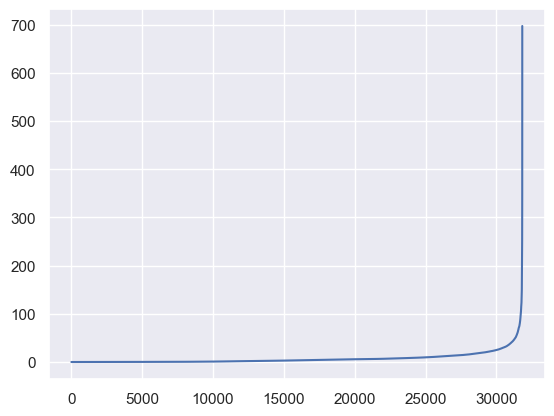

In [39]:
# K-distance graph to find out the right eps value
neigh = NearestNeighbors(n_neighbors=20)
neigh.fit(cui_data[s.cuisine_preferences])
distances, _ = neigh.kneighbors(cui_data[s.cuisine_preferences])
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.show()

In [31]:
# Concatenating the labels to df
df_concat = pd.concat([cui_data[s.cuisine_preferences], pd.Series(ms_labels, index=cui_data.index, name="dbscan_labels")], axis=1)
df_concat.head()

,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,dbscan_labels
customer_id,,,,,,,,,,,,,,,,
1b8f824d5e,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,0
5d272b9dcb,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0
f6d1b2ba63,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0
180c632ed8,0.00,13.70,0.0,0.0,0.0,0.0,0.0,0.0,17.86,0.0,0.0,0.0,0.0,0.0,0.0,0
4eb37a6705,14.57,40.87,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,487


In [32]:
# Detecting noise (potential outliers)
df_concat.loc[df_concat['dbscan_labels'] == -1]

,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,dbscan_labels
customer_id,,,,,,,,,,,,,,,,


In [33]:
# Computing the R^2 of the cluster solution
r2 = calculate_r2(df_concat, s.cuisine_preferences, 'dbscan_labels')
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.8263


### 2.4.3 Gaussian Mixture Model (GMM)

In [41]:
# Performing GMM clustering
gmm = GaussianMixture(n_components=4, covariance_type='full', n_init=10, init_params='kmeans', random_state=1)
gmm_labels = gmm.fit_predict(cui_data[s.cuisine_preferences])
labels_proba = gmm.predict_proba(cui_data[s.cuisine_preferences])

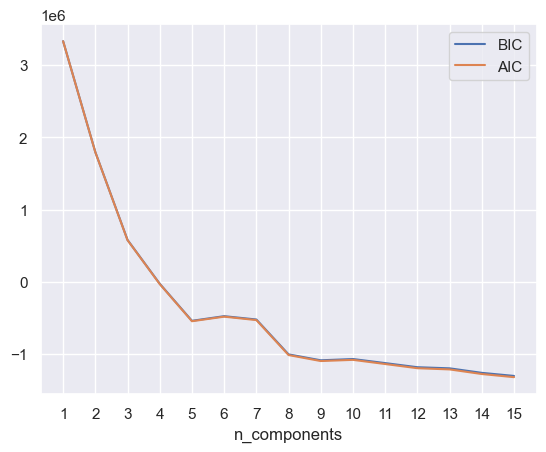

In [45]:
# Selecting number of components based on AIC and BIC
n_components = np.arange(1, 16)
models = [GaussianMixture(n, covariance_type='full', n_init=10, random_state=1).fit(cui_data[s.cuisine_preferences])
          for n in n_components]

bic_values = [m.bic(cui_data[s.cuisine_preferences]) for m in models]
aic_values = [m.aic(cui_data[s.cuisine_preferences]) for m in models]
plt.plot(n_components, bic_values, label='BIC')
plt.plot(n_components, aic_values, label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.xticks(n_components)
plt.show()

In [43]:
# Concatenating the labels to df
df_concat = pd.concat([cui_data[s.cuisine_preferences], pd.Series(gmm_labels, index=cui_data.index, name="gmm_labels")], axis=1)
df_concat.head()

,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,gmm_labels
customer_id,,,,,,,,,,,,,,,,
1b8f824d5e,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,2
5d272b9dcb,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0
f6d1b2ba63,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0
180c632ed8,0.00,13.70,0.0,0.0,0.0,0.0,0.0,0.0,17.86,0.0,0.0,0.0,0.0,0.0,0.0,2
4eb37a6705,14.57,40.87,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0


In [44]:
# Computing the R^2 of the cluster solution
r2 = calculate_r2(df_concat, s.cuisine_preferences, 'gmm_labels')
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.0667
